__Introduction:__ For this project, market data from Zillow was analyzed in order to assess current and historical housing prices.  For the current view, the three most recent years of data were reviewed (2017 - 2019).  For the historical view, the past 11 years of data were reviewed (2009 - 2019).  

The targeted audience is Minnesota home buyers.  The goal is to determine the best month out of the year to purchase a home in Minnesota.  In addition to the state of Minnesota, analysis was done at the national level to compare the populations and see if additional insights could be gained.  

Our hypothesis was December would be the best month to purchase a home and May would be the worst month to purchase a home.  We expected prices to be lower in December due to low competition and cold weather.  The reason being, we thought home buyers would be busy with their holiday plans and they wouldn't want to go home shopping when it's super cold out.  We expected prices to be the highest in May.  It's pretty common opinion that spring time is one of the busiest times of the year for home buying.  We expected prices to peak in May due to more competition and warm weather, making it a sub-optimal time to invest in a home.  In addition to this, we wanted to see if the housing market has bounced back since the collapse in the 2000s and see what the average home price increases were year over year.  

In [1]:
#Import dependencies/libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.stats as sts

In [2]:
#Create variable to save the location of Zillow csv file
pricefile = "Median_Sales_Price_10yrs.csv"
#Retrieve data from csv file and create dataframe (df)
df = pd.read_csv(pricefile)
df.head()

,Year,Month,Y/M,Median Sale Price,Location
0,2009,January,2009-01,159400,US
1,2009,February,2009-02,158000,US
2,2009,March,2009-03,156000,US
3,2009,April,2009-04,152000,US
4,2009,May,2009-05,148600,US


To slice and dice the data, code was used to select pieces of the data, based on year and location (US vs. Minnesota).  Mini dataframes were created to store smaller sub-sections of the data, which will be referenced later. 

In [3]:
#filters dataframes based on year
#Creates df for 2009
df_2009 = df.loc[df.Year==2009]
#Creates df for 2010
df_2010 = df.loc[df.Year==2010]
#Creates df for 2011
df_2011 = df.loc[df.Year==2011]
#Creates df for 2012
df_2012 = df.loc[df.Year==2012]
#Creates df for 2013
df_2013 = df.loc[df.Year==2013]
#Creates df for 2014
df_2014 = df.loc[df.Year==2014]
#Creates df for 2015
df_2015 = df.loc[df.Year==2015]
#Creates df for 2016
df_2016 = df.loc[df.Year==2016]
#Creates df for 2017
df_2017 = df.loc[df.Year==2017]
#Creates df for 2018
df_2018 = df.loc[df.Year==2018]
#Creates df for 2019
df_2019 = df.loc[df.Year==2019]

In [4]:
#Create filtered dataframes for US by Year
df_2009_usa=df_2009.loc[df_2009.Location=="US"]
df_2010_usa=df_2010.loc[df_2010.Location=="US"]
df_2011_usa=df_2011.loc[df_2011.Location=="US"]
df_2012_usa=df_2012.loc[df_2012.Location=="US"]
df_2013_usa=df_2013.loc[df_2013.Location=="US"]
df_2014_usa=df_2014.loc[df_2014.Location=="US"]
df_2015_usa=df_2015.loc[df_2015.Location=="US"]
df_2016_usa=df_2016.loc[df_2016.Location=="US"]
df_2017_usa=df_2017.loc[df_2017.Location=="US"]
df_2018_usa=df_2018.loc[df_2018.Location=="US"]
df_2019_usa=df_2019.loc[df_2019.Location=="US"]

#Create filtered dataframes for MN by Year
df_2009_mn=df_2009.loc[df_2009.Location=="MN"]
df_2010_mn=df_2010.loc[df_2010.Location=="MN"]
df_2011_mn=df_2011.loc[df_2011.Location=="MN"]
df_2012_mn=df_2012.loc[df_2012.Location=="MN"]
df_2013_mn=df_2013.loc[df_2013.Location=="MN"]
df_2014_mn=df_2014.loc[df_2014.Location=="MN"]
df_2015_mn=df_2015.loc[df_2015.Location=="MN"]
df_2016_mn=df_2016.loc[df_2016.Location=="MN"]
df_2017_mn=df_2017.loc[df_2017.Location=="MN"]
df_2018_mn=df_2018.loc[df_2018.Location=="MN"]
df_2019_mn=df_2019.loc[df_2019.Location=="MN"]

After data is sectioned out, we can start to build our graphs.  The x and y axis are defined, along with a title and lables.  Colors are selected from a gradient scale of going from dark blue to yellow.  Here we want to compare median home prices against month, for the years 2017 - 2019.  In the first graph we do it for the US, and in the second graph, it is done for Minnesota.  

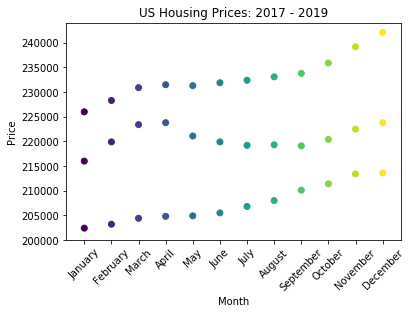

In [5]:
#Create US Scatter for 2017 - 2019 

#Define x and y axis
xaxis_2019_usa = df_2019_usa["Month"]
yaxis_2019_usa = df_2019_usa["Median Sale Price"]

xaxis_2018_usa = df_2018_usa["Month"]
yaxis_2018_usa = df_2018_usa["Median Sale Price"]

xaxis_2017_usa = df_2017_usa["Month"]
yaxis_2017_usa = df_2017_usa["Median Sale Price"]

#Create title for graph
plt.title("US Housing Prices: 2017 - 2019")
#Create labels for graph
plt.xlabel("Month")
plt.ylabel("Price")

#Select colors on gradient scale
colors = [1,2,3,4,5,6,7,8,9,10,11,12]

#Plot scatter points
plt.scatter(xaxis_2019_usa,yaxis_2019_usa, c = colors)
plt.scatter(xaxis_2018_usa,yaxis_2018_usa, c = colors)
plt.scatter(xaxis_2017_usa,yaxis_2017_usa, c = colors)

#Rotate text diagnoally on x-axis
plt.xticks(rotation=45)

#Show plot
plt.show()

From 2017 to 2019, you can see a general trend upwards for home prices for the US.  There appears to be a high point in March/April but it only happens in 2 out of the 3 years.  It's not sufficient enough to draw conclusions.  The only conclusion we can make is home prices increased in the US over those three years.  It is surprising to see for this dataset, our hypothesis is incorrect regarding home prices in December.  We expected them to be the lowest in December, but in all cases, December has relatively high prices.  

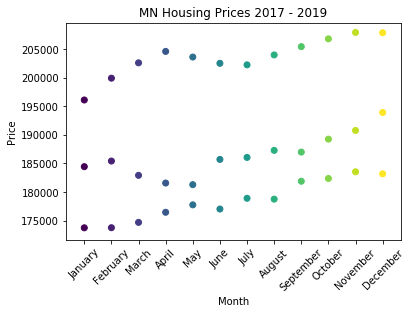

In [6]:
#Create MN Scatter for 2017 - 2019

#Define x and y axis
xaxis_2019_mn = df_2019_mn["Month"]
yaxis_2019_mn = df_2019_mn["Median Sale Price"]

xaxis_2018_mn = df_2018_mn["Month"]
yaxis_2018_mn = df_2018_mn["Median Sale Price"]

xaxis_2017_mn = df_2017_mn["Month"]
yaxis_2017_mn = df_2017_mn["Median Sale Price"]

#Create title for graph
plt.title("MN Housing Prices 2017 - 2019")
#Create lables for graph
plt.xlabel("Month")
plt.ylabel("Price")

#Select colors on gradient scale
colors = [1,2,3,4,5,6,7,8,9,10,11,12]

#Plot scatter points
plt.scatter(xaxis_2019_mn,yaxis_2019_mn, c=colors)
plt.scatter(xaxis_2018_mn,yaxis_2018_mn, c=colors)
plt.scatter(xaxis_2017_mn,yaxis_2017_mn, c=colors)

#Rotate text diagnoally on x-axis
plt.xticks(rotation=45)

#show plot
plt.show()

For the state of Minnesota, we see similar characteristics of a general trend upwards.  Prices are more volatile in Minnesota compared to the US with more peaks and valleys.  Since the US is much larger in scale, this could possibly be attributed to differences in size.  The US could have smoother results because it is measuring data points from a larger sample size.  Again our hypothesis on December being the best month to purchase a home is rejected.  We see December having high prices in yellow. We don't particularly see any patterns regarding the best or worst months to purchase a home.  One of the shortcomings of using the data on Zillow is that the pricing data is seasonally-adjusted.  Using seasonally-adjusted data prevents us from drawing the best conclusions regarding the best month to purchase a home.  Even with the seasonally-adjusted data, we don't really see consistent patterns that make us think there could even be a "best month" to purchase a home.  Perhaps it's just wishful thinking.  

For the last 2 graphs, we are comparing median home prices against the month again.  This time we're doing it for 11 years from 2009 to 2019.  This will help us see if we can gain any insights on seasonality for home prices.  Furthermore, we'd like to see if the economy has fully bounced back since the housing bubble and what did that look like.  We decided to create different lines by year to stack them on top of eachother and see if there are any patterns in regards to peaks and valleys over certain months.  We chose to plot 11 distinct lines, instead of 1 line with all years to see if we could capture monthly fluctuations in the data.  It allows you to compare the months visually to see if there are any high points or low points for any months.  

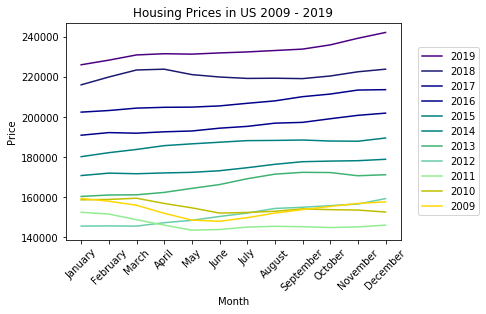

In [7]:
#Create US Line Graph for 2009 - 2019

#Define x and y axis
xaxis_2019_usa = df_2019_usa["Month"]
yaxis_2019_usa = df_2019_usa["Median Sale Price"]

xaxis_2018_usa = df_2018_usa["Month"]
yaxis_2018_usa = df_2018_usa["Median Sale Price"]

xaxis_2017_usa = df_2017_usa["Month"]
yaxis_2017_usa = df_2017_usa["Median Sale Price"]

xaxis_2016_usa = df_2016_usa["Month"]
yaxis_2016_usa = df_2016_usa["Median Sale Price"]

xaxis_2015_usa = df_2015_usa["Month"]
yaxis_2015_usa = df_2015_usa["Median Sale Price"]

xaxis_2014_usa = df_2014_usa["Month"]
yaxis_2014_usa = df_2014_usa["Median Sale Price"]

xaxis_2013_usa = df_2013_usa["Month"]
yaxis_2013_usa = df_2013_usa["Median Sale Price"]

xaxis_2012_usa = df_2012_usa["Month"]
yaxis_2012_usa = df_2012_usa["Median Sale Price"]

xaxis_2011_usa = df_2011_usa["Month"]
yaxis_2011_usa = df_2011_usa["Median Sale Price"]

xaxis_2010_usa = df_2010_usa["Month"]
yaxis_2010_usa = df_2010_usa["Median Sale Price"]

xaxis_2009_usa = df_2009_usa["Month"]
yaxis_2009_usa = df_2009_usa["Median Sale Price"]



#Plots line charts, adds colors for lines and creates labels for each line for the legend
line1 = plt.plot(xaxis_2019_usa,yaxis_2019_usa, label = "2019", color = "indigo")
line2 = plt.plot(xaxis_2018_usa,yaxis_2018_usa, label = "2018", color = "midnightblue")
line3 = plt.plot(xaxis_2017_usa,yaxis_2017_usa, label = "2017", color = "darkblue")
line4 = plt.plot(xaxis_2016_usa,yaxis_2016_usa, label = "2016", color = "darkblue")
line5 = plt.plot(xaxis_2015_usa,yaxis_2015_usa, label = "2015", color = "teal")
line6 = plt.plot(xaxis_2014_usa,yaxis_2014_usa, label = "2014", color = "teal")
line7 = plt.plot(xaxis_2013_usa,yaxis_2013_usa, label = "2013", color = "mediumseagreen")
line8 = plt.plot(xaxis_2012_usa,yaxis_2012_usa, label = "2012", color = "mediumaquamarine")
line9 = plt.plot(xaxis_2011_usa,yaxis_2011_usa, label = "2011", color = "lightgreen")
line10 = plt.plot(xaxis_2010_usa,yaxis_2010_usa, label = "2010", color = "y")
line11 = plt.plot(xaxis_2009_usa,yaxis_2009_usa, label = "2009", color = "gold")

#Rotate text diagnoally on x-axis
plt.xticks(rotation=45)

#Create title for graph
plt.title("Housing Prices in US 2009 - 2019")
#Create lables for graph
plt.xlabel("Month")
plt.ylabel("Price")

#Creates legend for line chart
plt.legend(bbox_to_anchor=(1.25, .5), loc='right')

#Show plot
plt.show()

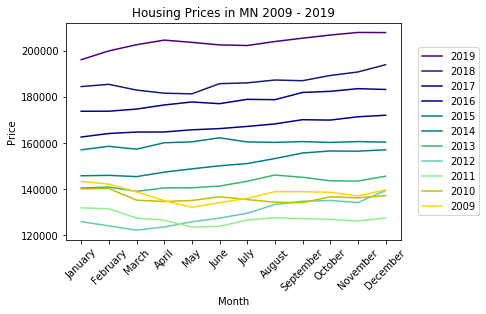

In [8]:
#Create Minnesota Line Graph for 2009 to 2019

#Define x and y axis
xaxis_2019_mn = df_2019_mn["Month"]
yaxis_2019_mn = df_2019_mn["Median Sale Price"]

xaxis_2018_mn = df_2018_mn["Month"]
yaxis_2018_mn = df_2018_mn["Median Sale Price"]

xaxis_2017_mn = df_2017_mn["Month"]
yaxis_2017_mn = df_2017_mn["Median Sale Price"]

xaxis_2016_mn = df_2016_mn["Month"]
yaxis_2016_mn = df_2016_mn["Median Sale Price"]

xaxis_2015_mn = df_2015_mn["Month"]
yaxis_2015_mn = df_2015_mn["Median Sale Price"]

xaxis_2014_mn = df_2014_mn["Month"]
yaxis_2014_mn = df_2014_mn["Median Sale Price"]

xaxis_2013_mn = df_2013_mn["Month"]
yaxis_2013_mn = df_2013_mn["Median Sale Price"]

xaxis_2012_mn = df_2012_mn["Month"]
yaxis_2012_mn = df_2012_mn["Median Sale Price"]

xaxis_2011_mn = df_2011_mn["Month"]
yaxis_2011_mn = df_2011_mn["Median Sale Price"]

xaxis_2010_mn = df_2010_mn["Month"]
yaxis_2010_mn = df_2010_mn["Median Sale Price"]

xaxis_2009_mn = df_2009_mn["Month"]
yaxis_2009_mn = df_2009_mn["Median Sale Price"]



#Plots line charts, adds colors for lines and creates labels for each line for the legend
line12 = plt.plot(xaxis_2019_mn,yaxis_2019_mn, label = "2019", color = "indigo")
line13 = plt.plot(xaxis_2018_mn,yaxis_2018_mn, label = "2018", color = "midnightblue")
line14 = plt.plot(xaxis_2017_mn,yaxis_2017_mn, label = "2017", color = "darkblue")
line15 = plt.plot(xaxis_2016_mn,yaxis_2016_mn, label = "2016", color = "darkblue")
line16 = plt.plot(xaxis_2015_mn,yaxis_2015_mn, label = "2015", color = "teal")
line17 = plt.plot(xaxis_2014_mn,yaxis_2014_mn, label = "2014", color = "teal")
line18 = plt.plot(xaxis_2013_mn,yaxis_2013_mn, label = "2013", color = "mediumseagreen")
line19 = plt.plot(xaxis_2012_mn,yaxis_2012_mn, label = "2012", color = "mediumaquamarine")
line20 = plt.plot(xaxis_2011_mn,yaxis_2011_mn, label = "2011", color = "lightgreen")
line21 = plt.plot(xaxis_2010_mn,yaxis_2010_mn, label = "2010", color = "y")
line22 = plt.plot(xaxis_2009_mn,yaxis_2009_mn, label = "2009", color = "gold")

#Rotate text diagnoally on x-axis
plt.xticks(rotation=45)

#Create title for graph
plt.title("Housing Prices in MN 2009 - 2019")
#Create lables for graph
plt.xlabel("Month")
plt.ylabel("Price")

#Creates legend for line chart
plt.legend(bbox_to_anchor=(1.25, .5), loc='right')

#Show plot
plt.show()

When you look at the two graphs, you can see from 2009 and 20011, home prices start to decline and then they hit an all time low in 2011.  We see the same pattern in the US data and also for the state of Minnesota.  From 2009 to 2011, home values declined by 3% each year.  In 2012, prices shot up by 9-10%.  Then after, they increased by 4.5% to 5.5% each year until 2019. 

__Conclusion:__ in the end, determining an optimal month to purchase a home does not seem realistic.  Home prices seem to be more impacted by economic factors than the time of year. Zillow's seasonally-adjusted data could possibly be diluting the changes we're seeing on a month-to-month basis.  If we had access to unadjusted data, perhaps it would be easier to see patterns in month-to-month fluctuations.  Even with the seasonally-adjusted data, there are peaks and valleys and none of them seem to be consistent based on particular months.  The one pattern that stands out is that home prices tend to increase and decrease during times of economic prosperity and downfalls.  Further analysis could be conducted to determine which economic indicators have the strongest correlation with home prices.  